In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Quality & Missing Value Assesment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender - Missing Values

In [12]:
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing "Gender" records is 2.12%


In [18]:
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())

Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


Married - Missing Values

In [19]:
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

Percent of missing "Married" records is 0.49%


In [22]:
print("Number of people who take a loan group by marital status :")
print(df['Married'].value_counts())

Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


Dependents- Missing Values

In [27]:
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


In [28]:
print("Number of people who take a loan group by dependents :")
print(df['Dependents'].value_counts())

Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Self Employed - Missing Values

In [24]:
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


In [25]:
print("Number of people who take a loan group by self employed :")
print(df['Self_Employed'].value_counts())

Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


Loan Amount - Missing Values

In [26]:
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


Loan Amount Term - Missing Values

In [29]:
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


In [30]:
print("Number of people who take a loan group by loan amount term :")
print(df['Loan_Amount_Term'].value_counts())

Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Credit History - Missing Values

In [31]:
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


In [32]:
print("Number of people who take a loan group by credit history :")
print(df['Credit_History'].value_counts())

Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [33]:
train_data = df.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [34]:
train_data.isnull().sum()
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

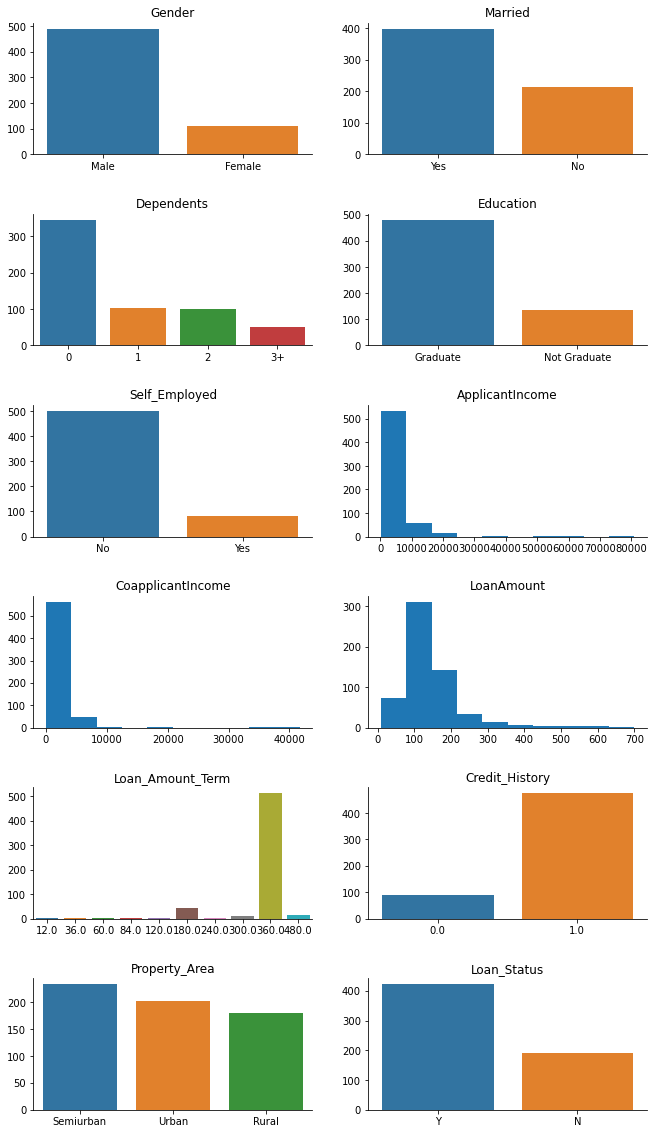

In [5]:
i, j = 0, 0
f, axes = plt.subplots(6, 2, figsize = (11, 20))
plt.subplots_adjust(hspace = .45)

for col in df.columns[1:]:
    if col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
        axes[i,j].hist(df[col].dropna())
    else:
        bar_data = df[col].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = axes[i,j])
    axes[i, j].set_title(col)
    axes[i, j].spines['top'].set_visible(False)
    axes[i, j].spines['right'].set_visible(False)
    j += 1 
    if j ==2:
        i += 1
        j = 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


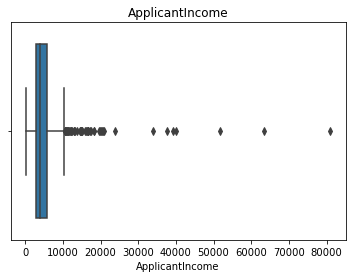

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


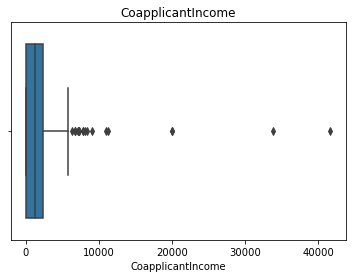

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


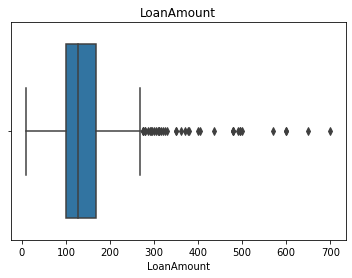

In [6]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.boxplot(df[col].dropna(), orient = 'v')
    plt.title(col)
    plt.show()